# 가위바위보 판별기

## 1. 라이브러리 import

In [277]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

import numpy as np
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## 2. Image Resize

In [278]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
# 추가한 test셋
# image_dir_path = os.getenv("HOME") + "/Documents/Exploration/1/test/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


In [279]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
# 추가한 test셋
# image_dir_path = os.getenv("HOME") + "/Documents/Exploration/1/test/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [280]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
# 추가한 test셋
# image_dir_path = os.getenv("HOME") + "/Documents/Exploration/1/test/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


## 3. Data Load

In [290]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=1941   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1941 입니다.
x_train shape: (1941, 28, 28, 3)
y_train shape: (1941,)


### Load한 데이터를 train data : 80%, validation_data : 10%, test_data : 10% 의 비율로 나누기
- <b>이후에 test_data는 새로 생성</b>
- total_x에는 정규화한 값을 저장

In [291]:
total_x, total_y = x_train_norm, y_train
leng_x, leng_y = len(total_x), len(total_y)
x_train, x_valid, x_test= total_x[:int(leng_x*0.8)], total_x[int(leng_x*0.8):int(leng_x*0.9)], total_x[int(leng_x*0.9):]
y_train, y_valid, y_test= total_y[:int(leng_y*0.8)], total_y[int(leng_y*0.8):int(leng_y*0.9)], total_y[int(leng_y*0.9):]

### image, label 확인

라벨:  0


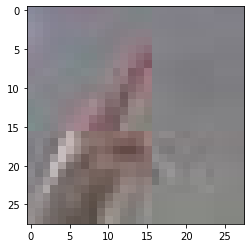

In [292]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## +. 추가 test데이터

- 이전에 만든 test데이터에 대해서 값이 너무 크게 나왔음
- 새로 rock, scissor, paper를 새로 300장을 촬영 후에 평가를 실행

In [311]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/Documents/Exploration/1/test" #rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


## 4. Model 설계

- 추가한 내용
 - Dropout층 추가

In [396]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers


# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

inputs = layers.Input((28, 28, 3), name = 'input_layer')

# Feature Extraction
net = layers.Conv2D(32, (3, 3), padding = 'SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D((2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64, (3, 3), padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D((2, 2))(net)
net = layers.Dropout(0.5)(net)

# Classification
net = layers.Flatten()(net)  
net = layers.Dense(128)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.4)(net)
net = layers.Dense(3)(net)  

net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs=net, name='rcp_CNN')
# estimator = tf.keras.estimator.model_to_estimator(model)
# 위에 처럼 만든 모델을 에스티메이터로 바꾸고 싶을때는 이렇게

model.summary()

Model: "rcp_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv2d_236 (Conv2D)          (None, 28, 28, 32)        896       
_________________________________________________________________
activation_441 (Activation)  (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_172 (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_271 (Dropout)        (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_237 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_442 (Activation)  (None, 14, 14, 64)        0   

## 5. model 학습

In [397]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train,y_train, validation_data=(x_valid, y_valid), epochs=15)

Epoch 1/15
49/49 [==============================] - 0s 3ms/step - loss: 1.0523 - accuracy: 0.4240 - val_loss: 1.2164 - val_accuracy: 0.0000e+00
Epoch 2/15
49/49 [==============================] - 0s 2ms/step - loss: 0.9975 - accuracy: 0.4884 - val_loss: 1.2411 - val_accuracy: 0.0000e+00
Epoch 3/15
49/49 [==============================] - 0s 2ms/step - loss: 0.9150 - accuracy: 0.5715 - val_loss: 1.3329 - val_accuracy: 0.0000e+00
Epoch 4/15
49/49 [==============================] - 0s 2ms/step - loss: 0.7917 - accuracy: 0.6482 - val_loss: 1.1523 - val_accuracy: 0.0000e+00
Epoch 5/15
49/49 [==============================] - 0s 2ms/step - loss: 0.7308 - accuracy: 0.6830 - val_loss: 1.4207 - val_accuracy: 0.0000e+00
Epoch 6/15
49/49 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.6946 - val_loss: 1.2481 - val_accuracy: 0.0000e+00
Epoch 7/15
49/49 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.7139 - val_loss: 1.2733 - val_accuracy: 0.0

## 6. Model 평가

In [398]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 959us/step - loss: 0.9024 - accuracy: 0.6367


[0.9023663401603699, 0.6366666555404663]

## 7. 예측 시각화

- result_image_paths에 모든 이미지에 대한 경로들을 저장
- np.random.randint를 사용해서 난수 생성
- 랜덤하게 image를 불러와서 예측 후 결과 출력

In [274]:
# 기존의 데이터셋
# result_image_paths= glob.glob('aiffel/rock_scissor_paper/*/*.jpg')
# 새로운 테스트 데이터셋
result_image_paths= glob.glob('Documents/Exploration/1/test//*/*.jpg')

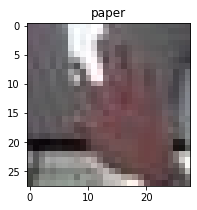

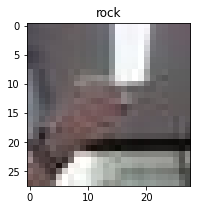

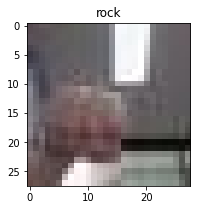

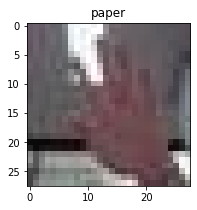

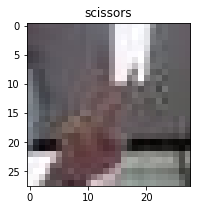

In [276]:
for i in range(5) :
    # 랜덤 이미지
    rand_img = result_image_paths[np.random.randint(len(result_image_paths))]
    # image 열기
    pil_image = tf.io.read_file(rand_img)
    image = tf.io.decode_jpeg(pil_image)
    # plot해주기 위해서 원본 사진 저장
    origin_img = image
    # model예측을 하기위해서 새로운 차원을 추가
    image = image[tf.newaxis, ...]
    # 사진 예측
    pred = model.predict(image)
    
    # 시각화
    plt.figure(figsize=(15, 3))
    plt.imshow(origin_img)
    # title에 각 값에 대한 '가위', '바위', '보' 출력
    if np.argmax(pred[0]) == 0 :
        predict = "scissors"
    elif np.argmax(pred[0]) == 1 :
        predict = "rock"
    else :
        predict = "paper"
    plt.title(predict)
    plt.show()

## 정리
- 기존의 Sequential 모델과는 다르게, 이전에 해보았던 Functional 모델을 활용
- overfitting을 예방을 위해서
 - dropout과 정규화 수행
 - 다른 분들의 데이터를 종합해서 데이터의 수를 늘렸음